# Checkpoint 3 - Classificadores


### Dataset: SPAM

Você recebeu dados com frequências de certas palavras e certos caracteres presentes em emails. Os emails foram rotulados entre SPAM e NÃO SPAM. Agora é necessários fazer um código de computador que capture automaticamente se o email é spam ou não baseado nessas informações estatísticas do texto presente nele.

Classes alvo:
- "0": não é SPAM
- "1": SPAM

Mais informações sobre os dados podem ser obtidas em https://www.openml.org/d/44


### Instruções

Leia atentamente as instruções.

1) O trabalho deve ser realizado em grupo de até 4 pessoas. Obrigatoriamente da mesma bancada. 

2) Você deverá submenter este arquivo Jupyter Notebook com as respostas nos campos indicados. Caso ache necessário, crie células markdown para comentar suas respostas e apontamentos.

3) Apenas um aluno submeterá no Teams. Mude o nome do arquivo para as iniciais do seu nome completo seguido do seu RM. Exemplo: HFS84100-CP1

4) A entrega deverá ser feita até às <font color='red'>**23h59** </font> de  <font color='red'>**terça (24/05/2022)** </font> na respectiva tarefa no Microsoft Teams.

5) As pontuações das questões estão marcadas em cada uma.

6) Você pode usar códigos prontos, mas não copiar dos outros grupos. Lembre-se que dificilmente duas pessoas pensam exatamente nos mesmos nomes de variáveis e nas mesmas frases de comentários. <font color='red'>Se forem pegos dois arquivos iguais ou extremamente semelhantes, ambos serão desconsiderados e a nota será zerada para os dois grupos </font>.

-------------------------------

## Nomes:

Laura Giancoli Aschenbrenner RM 87194

Nickolas Pereira dos Santos RM 88103

Gabriel Pionte Paulino RM 84539

Gabriel Anselmo Pires dos Santos RM 87010

---------------------------

## Questão 1:  Carregue os dados descritivos e alvo na mesma tabela. Responda:

(a) Quantas linhas há no dataset?<font color='red'> (0.5 ponto) </font>

(b) Quantas colunas há no dataset?<font color='red'> (0.5 ponto) </font>

(c) Em média quantas vezes a palavra **money** aparece nos emails?<font color='red'> (0.5 ponto) </font>

(d) Qual é a **palavra** que mais aparece nos emails? (dica: use o sort_values no max do dataframe)<font color='red'>  (0.5 ponto) </font>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
dados = fetch_openml(data_id=44)
df_emails = pd.DataFrame(data = dados.data, columns=dados.feature_names)
df_emails.info()
df_emails.word_freq_money.mean()
df_emails.sum().sort_values()

## Coloque suas respostas aqui
## A: 4601. B: 57. C: 0.0942686372527711. D: word_freq_you é a que mais aparece com 7647.320.

## Questão 2:  Faça a separação treino teste. <font color='red'> (1.5 pontos) </font>

Coloque os valores descritivos na variável x e os valores alvo na variável y. Use 80% do dataset para treinamento e 20% para teste. Estratifique a separação em y e use 42 como seed para a geração da sequência aleatória.

In [36]:
import pandas as pd
from sklearn.datasets import fetch_openml
dataset = fetch_openml(data_id=44)
target_map = {
    '0': 'naoSPAM',
    '1': 'spam',
}
df_emails['alvo'] = [target_map[target] for target in dataset.target]
df_emails.describe()
df_emails.groupby('alvo').std()
df_emails.groupby('alvo').mean()
x = df_emails.drop(columns = ['alvo']) 
y = df_emails['alvo']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify=y)
# Coloque seu código aqui

## Questão 3:  Crie um classificador com acurácia maior do que 85%. <font color='red'> (4 pontos) </font>

Plote a matriz de confusão e comente os resultados obtidos em cima dos dados de teste.

Nesta mesma célula markdown, descreva quais foram as técnicas que você usou para conseguir essa acurácia.

              precision    recall  f1-score   support

     naoSPAM       0.80      0.90      0.85       558
        spam       0.81      0.65      0.72       363

    accuracy                           0.80       921
   macro avg       0.81      0.78      0.78       921
weighted avg       0.80      0.80      0.80       921



<Figure size 1080x360 with 0 Axes>

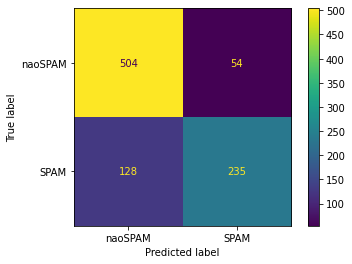

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report
import matplotlib.pyplot as plt 
import numpy as np

knn = KNeighborsClassifier(n_neighbors=4)  
knn.fit(x_train, y_train)

knn.fit(x_train, y_train)
y_predicoes = knn.predict(x_test) 
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes)


figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['naoSPAM','SPAM'])
disp.plot(values_format='d') 
print(classification_report(y_test, y_predicoes))

## Coloque seu código aqui

In [49]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

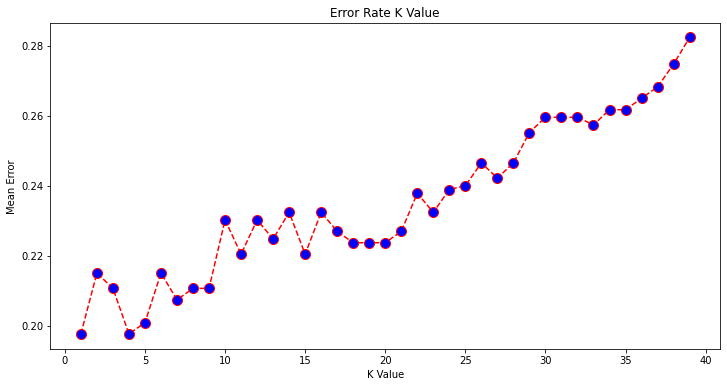

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Questão 4:  Agora seu classificador de spam precisa ter acurácia de 90% e precisão de 90% no escopo dos não spams (label = 1). <font color='red'> (2.5 pontos) </font>


In [ ]:
## Coloque seu código aqui